# Twitter Data Analysis

## Problem Description :
You are provided a sample raw twitter metadata data. Your task is to process and clean this
data to extract the core content of the tweet and then draw a at least 2 meaningful insights from
the data e.g., most tweeted twitter handle, some statistical insight, distribution of topic or
sentiment of tweets, OR anything you find noteworthy about this dataset

## Objective :
Write an jupyter notebook to
- 1. Pre-process/clean raw twitter data
- 2. Investigate and draw insights from the data

In [3]:
# import the required library 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# read the twitter dataset
data = pd.read_csv("train_data.csv")

data.head()# display the first 5 data points

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [5]:
data.tail() # display the last 5 data points

,sentiment,content
29995,happiness,I had a great date last night...tried to find ...
29996,sadness,With alex
29997,happiness,@fureousangel that is comedy good luck my fri...
29998,fun,stephs grad party gr8! shoved cake in her face...
29999,happiness,@jesfive SWEEEEET - San Fran is awesome!!!! L...


In [6]:
# check the shape of dataset
data.shape

(30000, 2)

There are 30000 data points and two features

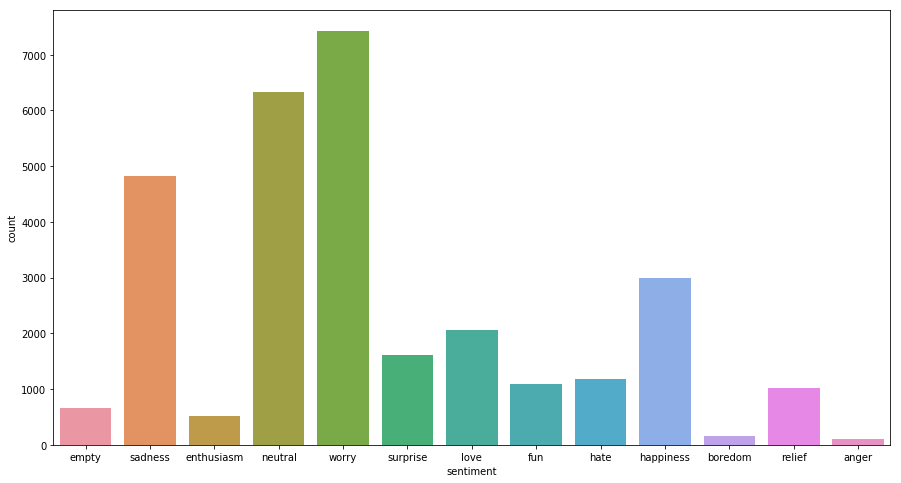

data points with sentiment  empty  =  659 	 which is  2.197 %	 of the whole datapoints.
data points with sentiment  sadness  =  4828 	 which is  16.093 %	 of the whole datapoints.
data points with sentiment  enthusiasm  =  522 	 which is  1.74 %	 of the whole datapoints.
data points with sentiment  neutral  =  6340 	 which is  21.133 %	 of the whole datapoints.
data points with sentiment  worry  =  7433 	 which is  24.777 %	 of the whole datapoints.
data points with sentiment  surprise  =  1613 	 which is  5.377 %	 of the whole datapoints.
data points with sentiment  love  =  2068 	 which is  6.893 %	 of the whole datapoints.
data points with sentiment  fun  =  1088 	 which is  3.627 %	 of the whole datapoints.
data points with sentiment  hate  =  1187 	 which is  3.957 %	 of the whole datapoints.
data points with sentiment  happiness  =  2986 	 which is  9.953 %	 of the whole datapoints.
data points with sentiment  boredom  =  157 	 which is  0.523 %	 of the whole datapoints.
data poi

In [7]:
### Distribution of different classes
plt.figure(figsize=(15,8))
sns.countplot(x='sentiment',data=data)
plt.show()

sentiment = data['sentiment'].unique() # unique sentiment 
for senti in sentiment:
    print('data points with sentiment ',senti,' = ',len(data[data['sentiment']==senti]),'\t which is ',round((len(data[data['sentiment']==senti])/len(data))*100,3),'%\t of the whole datapoints.')

#### Observation:
Here 'worry', 'neutral', 'sadness', 'happiness' data points are more compare to other classes data points

#### Numbers of character in each data points

In [8]:
data['length_of_text'] = data['content'].str.len()
data.head()

,sentiment,content,length_of_text
0,empty,@tiffanylue i know i was listenin to bad habi...,92
1,sadness,Layin n bed with a headache ughhhh...waitin o...,60
2,sadness,Funeral ceremony...gloomy friday...,35
3,enthusiasm,wants to hang out with friends SOON!,36
4,neutral,@dannycastillo We want to trade with someone w...,86


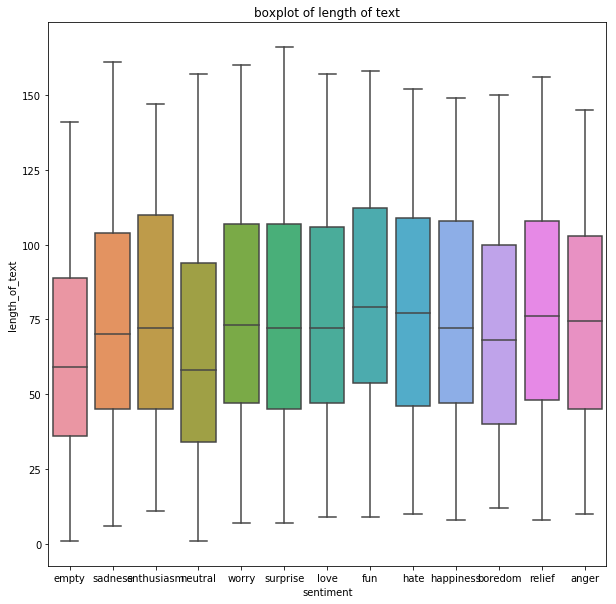

In [13]:
# plotting boxplot of 'word_count'
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="sentiment", y="length_of_text", data=data)
plt.title("boxplot of length of text")
plt.show()

* As we can see that most of the no. of characters lies between 50 to 100 that means no. of tweets with total no. of words betwween 50 to 100 is high. As we can see that boxplot of all the classes are overlapping so length_of_text is not so important feature.

### Data Cleaning

In [15]:
import re

#https://stackoverflow.com/questions/4278313/python-how-to-cut-off-sequences-of-more-than-2-equal-characters-in-a-string?fbclid=IwAR397HRMq3BILIL5VIs3kFBPf_KF7Z0siH2FG3MubLYPkOXIdcbVAaGj_Is
def ReplaceThreeOrMore(s):
    # pattern to look for three or more repetitions of any character, including
    # newlines.
    pattern = re.compile(r"(.)\1{2,}", re.DOTALL) 
    return pattern.sub(r"\1\1", s)

In [16]:
def clean_text(text):
    
    text = text.lower() # convert text to lower case string or lower case text
    text = re.sub(r'@[\S]+','USER_MENTION',text)  # replace the @user_name to USER_MENTION
    text = re.sub(r'((www\.[S]+)|(https?://[\S]+))','URL',text)# replcae the website link to only "URL"
    
    text = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))','EMO_POS',text) # Replacing Simile emoji to EMO_POS
    text = re.sub(r'(:\s?D|:-D|x-?D|X-?D)','EMO_POS',text) # Replacing Laugh emooji to EMO_POS
    text = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)','EMO_POS',text) # Replacing Wink emooji to EMO_POS
    
    text = re.sub(r'(<3|:\*)','EMO_POS',text) # Replacing Love emooji to EMO_POS
    text = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)','EMO_NEG',text) # Replacing Sad emooji to EMO_POS
    text = re.sub(r'(:,\(|:\'\(|:"\()','EMO_NEG',text) #Replacing Cry emooji to EMO_POS
    text = re.sub(r'#','',text) # Removing hash(#) symbol .
    
    text = re.sub(r'\brt\b', '', text)# Removing retweet 'rt' 
    text = re.sub(r'\.\.+', ' ', text) # Replacing two or more dot to single space
    
    text = re.sub(r'!+',' ',text) # Replacing single or more than one explanation symbol to single space
    text = re.sub(r'\*+',' ',text) # Replacing one or more star(*) symbol to single space
    text = re.sub(r';+',' ',text)   # Replacing  single semicolor(;)  or more semicolon(;) symbol to single space
    text = re.sub(r':+',' ',text)   # Replacing single colon(:) or more colon(:) sybol to single space
    text = re.sub(r"\'+",' ', text) # Replacing single quote or more single quote to single space
    
    text = re.sub(r'\"+',' ', text) # Replacing double quote or more double  quote to single space
    text = re.sub(r'\?+',' ', text) # Replacing single question mark or more question mark to single space
    text = re.sub(r'-+', '', text) # Replacing single hypen  symbol or more hypen symbol  to single space
    text = re.sub(r'[\(\)]+',' ', text) # Replacing left paranthesis or right paraenthesis to single space
    
    text = ReplaceThreeOrMore(text) # call the function ReplaceThreeOrMore(text)
    text = re.sub(r'  +',' ',text) # Replacing two or more white space to single white space
    
    return text  # return the text

In [17]:
data['clean_text'] = data['content'].map(clean_text) #map data's content to clean_text function

In [18]:
data.head(10) # display the first 10 datapoints 

,sentiment,content,length_of_text,clean_text
0,empty,@tiffanylue i know i was listenin to bad habi...,92,USER_MENTION i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...,60,layin n bed with a headache ughh waitin on you...
2,sadness,Funeral ceremony...gloomy friday...,35,funeral ceremony gloomy friday
3,enthusiasm,wants to hang out with friends SOON!,36,wants to hang out with friends soon
4,neutral,@dannycastillo We want to trade with someone w...,86,USER_MENTION we want to trade with someone who...
5,worry,Re-pinging @ghostridah14: why didn't you go to...,84,repinging USER_MENTION why didn t you go to pr...
6,sadness,"I should be sleep, but im not! thinking about ...",132,"i should be sleep, but im not thinking about a..."
7,worry,Hmmm. http://www.djhero.com/ is down,36,hmm. URL is down
8,sadness,@charviray Charlene my love. I miss you,39,USER_MENTION charlene my love. i miss you
9,sadness,@kelcouch I'm sorry at least it's Friday?,42,USER_MENTION i m sorry at least it s friday


In [19]:
# reomve the duplicates tweet 
len_before_removing_dup = len(data)
data.drop_duplicates(['clean_text'], inplace=True)
print('we have removed ',len_before_removing_dup-len(data),' duplicate tweeets')

we have removed  401  duplicate tweeets


In [20]:
data.shape

(29599, 4)

### Numbers of User_Handles in data points

In [21]:
# function to count numbers of user_handles in data points
def count_user_mention(x):
    count = 0
    for word in x.split():
        if(word=='USER_MENTION'):
            count+=1
    return count



In [22]:
# apply the map function from clean_text to count_user_mention
data['total_user_mention'] = data['clean_text'].map(count_user_mention)



In [23]:
y = [] # create y list to store numbers of user_handles
for i in range(11):
    l = len(data[data['total_user_mention']==i])
    y.append(l)



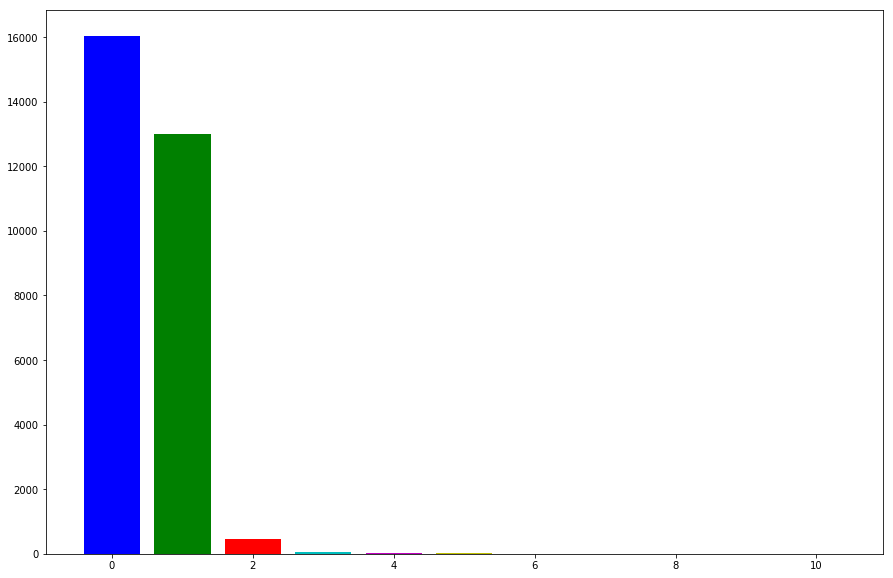

Numbers of data points is  16030  with  0 numbers of USER_MENTION, which is 54.157 %	 of the whole datapoints.
Numbers of data points is  13012  with  1 numbers of USER_MENTION, which is 43.961 %	 of the whole datapoints.
Numbers of data points is  455  with  2 numbers of USER_MENTION, which is 1.537 %	 of the whole datapoints.
Numbers of data points is  59  with  3 numbers of USER_MENTION, which is 0.199 %	 of the whole datapoints.
Numbers of data points is  24  with  4 numbers of USER_MENTION, which is 0.081 %	 of the whole datapoints.
Numbers of data points is  13  with  5 numbers of USER_MENTION, which is 0.044 %	 of the whole datapoints.
Numbers of data points is  3  with  6 numbers of USER_MENTION, which is 0.01 %	 of the whole datapoints.
Numbers of data points is  1  with  7 numbers of USER_MENTION, which is 0.003 %	 of the whole datapoints.
Numbers of data points is  1  with  8 numbers of USER_MENTION, which is 0.003 %	 of the whole datapoints.
Numbers of data points is  0  wi

In [24]:
# plot the bar plot 
plt.figure(figsize=(15,10))
plt.bar(x=list(range(11)), height=y, color=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','orange'])
plt.show()

# find the number of user_handles with respect datapoints
k =0
for i in y:
    print('Numbers of data points is ',i,' with ',k,"numbers of USER_MENTION, which is" ,round((i/len(data))*100,3),'%\t of the whole datapoints.')
    k+=1

    

### Observation:
1. There is 16030 data points or 54.157% of data points that have zero handles.that is in 16030 data points there is no user_handles.

**e.g: India great country.**<br>

2. There is 13012 data points or 43.96% of data points that have 1 user handle,that is 13012 data points have only one user handle. <br>

**e.g: @vahan company**
3. There is 455 data points or 1.537% of data points that have 2 user handle,that is 455 data points have only two user handle. <br>
**e.g: @abc love machine learning and @xyz love deep learning.** <br>
and so on.


### Total numbers of URL(link) in data set

In [25]:
def Nos_of_URL(x):
    count = 0
    for word in x.split():
        if(word=='URL'):
            count+=1
    return count

In [26]:
# apply the map function from clean_text to Nos_of_URL
data['total_url'] = data['clean_text'].map(Nos_of_URL)

In [27]:
y = [] # create y list to store numbers of user_handles
for i in range(8):
    l = len(data[data['total_url']==i])
    y.append(l)



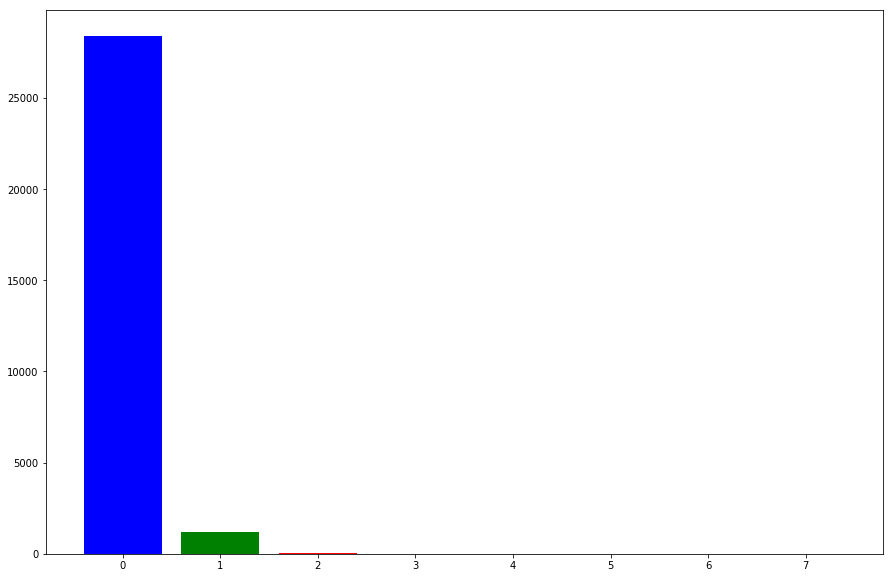

Total number of datapoints which have 0 numbers of URL ==  28386
Total number of datapoints which have 1 numbers of URL ==  1193
Total number of datapoints which have 2 numbers of URL ==  19
Total number of datapoints which have 3 numbers of URL ==  1
Total number of datapoints which have 4 numbers of URL ==  0
Total number of datapoints which have 5 numbers of URL ==  0
Total number of datapoints which have 6 numbers of URL ==  0
Total number of datapoints which have 7 numbers of URL ==  0


In [28]:
# plot bar plot for numbers of URL in dataset
plt.figure(figsize=(15,10))
plt.bar(x=list(range(8)), height=y, color=['b','g','r'])
plt.show()

# Find the nmbers of URL(links) with respect datapoints
for i in range(len(y)):
    print("Total number of datapoints which have",i, "numbers of URL == ",y[i])


In [29]:
# import the nltk package
from nltk.corpus import stopwords # import stopwords
import nltk

In [33]:
# removing stopwords and apply stemming

sno=nltk.stem.SnowballStemmer('english') # Stemming using SnowballStemmer
stop=set(stopwords.words('english')) # unique set of stopwords

# A function to remove stopwords and make stemming for words
def text_cleaning(sentence):
    filtered_sentence=[] # empty list
    
    # iterate the loop for senteces
    for word in sentence.split():
        
        # if word is alpha and numeric and words greater than len(2). 
        # Here we use words should greater than len(2) because a meaningful word have atleat three characters
        if((word.isalpha()) & (len(word)>2)):
            
            # if word is not in the set of stopwords
            if(word not in stop):
                
                # stem the word
                s=(sno.stem(word)).encode('utf8')
                
                # append the stemming word in the filtered_sentence
                filtered_sentence.append(s)
            else:
                continue
                
        else:
            continue
    string =b" ".join(filtered_sentence) # join the filtered_sentence
    return string # return string

In [34]:
data['no_stop_stem_text_data'] = data['clean_text'].map(text_cleaning) # map the clean_text to text_cleaning

In [35]:
data.head()

,sentiment,content,length_of_text,clean_text,total_user_mention,total_url,no_stop_stem_text_data
0,empty,@tiffanylue i know i was listenin to bad habi...,92,USER_MENTION i know i was listenin to bad habi...,1,0,b'know listenin bad habit earlier start freaki...
1,sadness,Layin n bed with a headache ughhhh...waitin o...,60,layin n bed with a headache ughh waitin on you...,0,0,b'layin bed headach ughh waitin call'
2,sadness,Funeral ceremony...gloomy friday...,35,funeral ceremony gloomy friday,0,0,b'funer ceremoni gloomi friday'
3,enthusiasm,wants to hang out with friends SOON!,36,wants to hang out with friends soon,0,0,b'want hang friend soon'
4,neutral,@dannycastillo We want to trade with someone w...,86,USER_MENTION we want to trade with someone who...,1,0,b'want trade someon houston one'


In [36]:
# import the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer for only unigram range
vectorizer_uni = TfidfVectorizer(max_features=50) # here we are taking only maximum features is 50
vector = vectorizer_uni.fit_transform(data['no_stop_stem_text_data'])

In [37]:
#finding top 50 features and their idf
idf = vectorizer_uni.idf_
words = vectorizer_uni.get_feature_names() # get the feature names
index = np.argsort(idf) # sort the idf in increasing order
print('Top 50 words and their idf--\n')
print('words\t\t\t\tidf')
print('*'*50)
for i in range(len(index)):
    print(words[index[i]],'\t\t:\t\t',round(idf[index[i]],3)) # print the words and its repsctive idf values

Top 50 words and their idf--

words				idf
**************************************************
get 		:		 3.636
work 		:		 3.885
day 		:		 3.887
like 		:		 3.978
good 		:		 4.055
got 		:		 4.175
miss 		:		 4.186
url 		:		 4.186
go 		:		 4.236
want 		:		 4.246
love 		:		 4.255
one 		:		 4.35
feel 		:		 4.35
today 		:		 4.354
back 		:		 4.407
time 		:		 4.415
know 		:		 4.422
see 		:		 4.431
realli 		:		 4.45
think 		:		 4.468
need 		:		 4.595
make 		:		 4.613
hope 		:		 4.622
still 		:		 4.625
lol 		:		 4.647
look 		:		 4.653
new 		:		 4.662
wish 		:		 4.696
thank 		:		 4.742
last 		:		 4.762
home 		:		 4.779
sad 		:		 4.794
much 		:		 4.797
come 		:		 4.8
well 		:		 4.945
watch 		:		 4.945
tri 		:		 4.975
bad 		:		 4.978
night 		:		 4.98
would 		:		 4.998
sorri 		:		 5.011
hate 		:		 5.079
morn 		:		 5.085
week 		:		 5.087
twitter 		:		 5.087
wait 		:		 5.097
could 		:		 5.113
great 		:		 5.122
gonna 		:		 5.132
say 		:		 5.141


In [38]:
# TfidfVectorizer for only bigram range
vectorizer_bi = TfidfVectorizer(max_features=50, ngram_range=(2,2))
vector_bi = vectorizer_bi.fit_transform(data['no_stop_stem_text_data'])

In [39]:
#finding top 50 features and their idf
idf_bi = vectorizer_bi.idf_
words_bi = vectorizer_bi.get_feature_names() # get the feature names
index_bi = np.argsort(idf_bi) # sort the idf in increasing order
print('Top 50 words and their idf--\n')
print('words\t\t\t\tidf')
print('--'*20)
for i in range(len(index_bi)):
    print(words_bi[index_bi[i]],'\t\t:\t\t',round(idf_bi[index_bi[i]],3))

Top 50 words and their idf--

words				idf
----------------------------------------
feel like 		:		 5.93
wish could 		:		 5.973
look like 		:		 6.119
last night 		:		 6.166
good morn 		:		 6.305
look forward 		:		 6.551
get readi 		:		 6.604
last day 		:		 6.731
star war 		:		 6.752
next week 		:		 6.796
good luck 		:		 6.889
bank holiday 		:		 6.901
realli want 		:		 6.952
good day 		:		 6.991
mother day 		:		 7.005
come back 		:		 7.047
feel better 		:		 7.047
war day 		:		 7.061
happi star 		:		 7.106
hope get 		:		 7.121
sorri hear 		:		 7.121
want see 		:		 7.137
back work 		:		 7.168
let know 		:		 7.168
sound like 		:		 7.185
one day 		:		 7.201
got back 		:		 7.288
need get 		:		 7.288
tri get 		:		 7.288
great day 		:		 7.325
work tomorrow 		:		 7.325
cant wait 		:		 7.344
feel bad 		:		 7.384
best friend 		:		 7.384
get better 		:		 7.384
make sad 		:		 7.404
go miss 		:		 7.404
gonna miss 		:		 7.404
dont know 		:		 7.445
make feel 		:		 7.467
feel good 		:		 7.489
work toda

### WordCloud for clean_text

In [40]:
text_data = ' ' #empty text_data
for i in range(len(data)):
    text_data = text_data + ' ' + data.iloc[i]['clean_text']

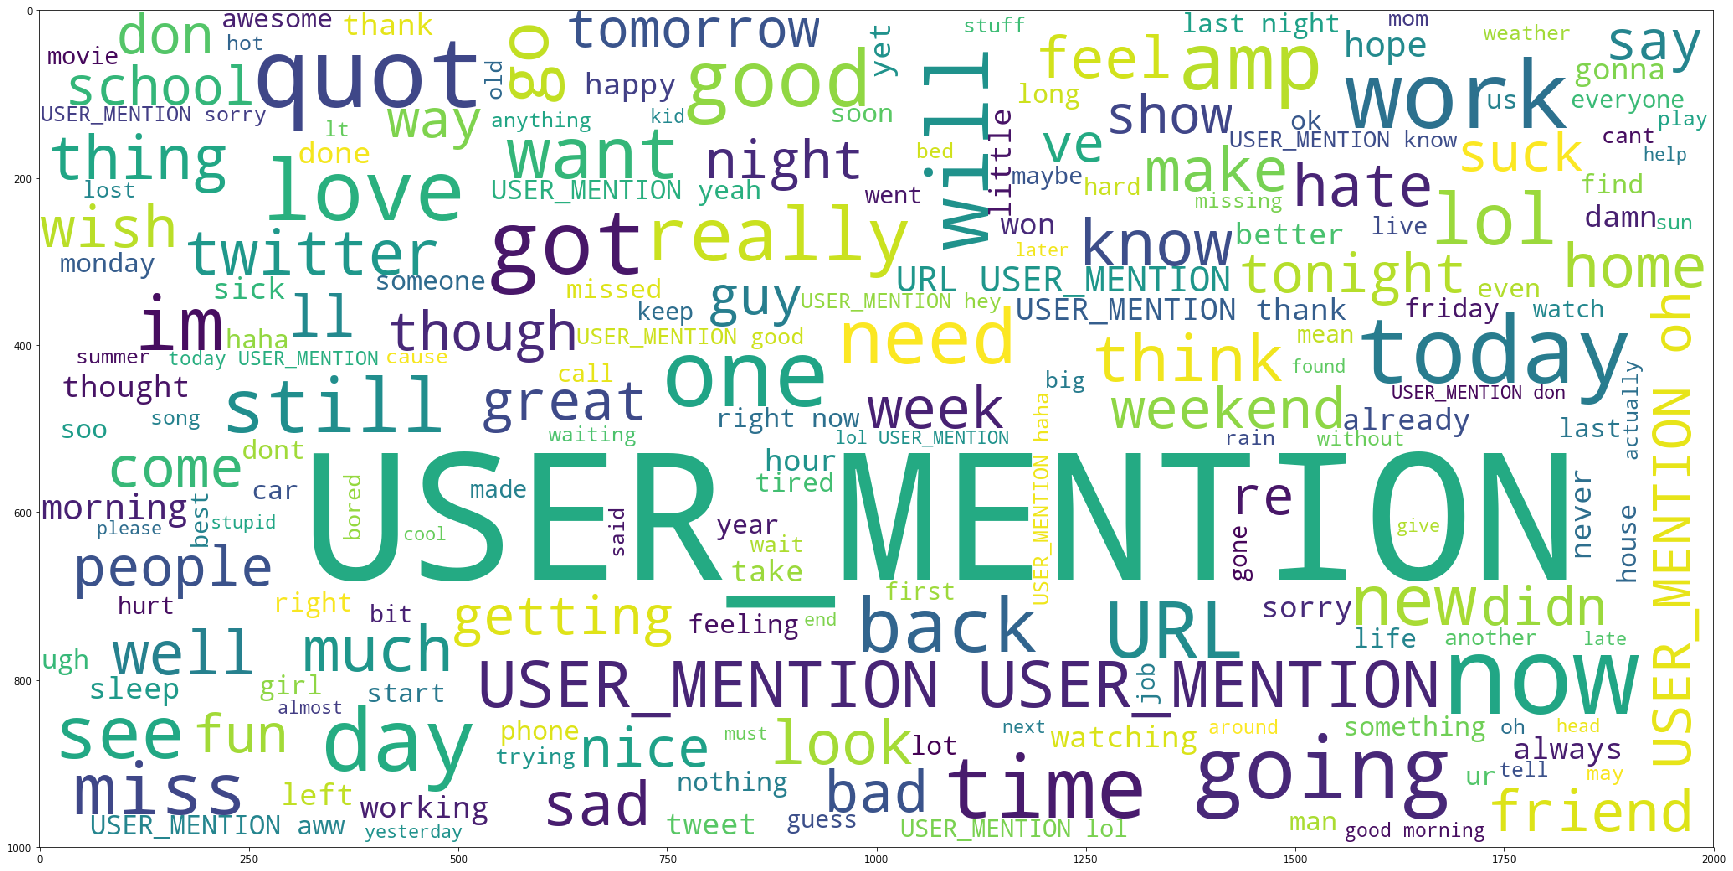

In [44]:
from wordcloud import WordCloud #import wordcloud
plt.figure(figsize=(30,20)) #figure size
wordcloud = WordCloud(background_color="white",mode = "RGB", width = 2000, height=1000).generate(text_data)
plt.imshow(wordcloud) # show image

### Observation:
Here we see that most frequent words are USER_MENTION(@user_name), now,today,still,URL,good etc

### WorcCloud for cleaned with stemming words

In [47]:
text_data_1 = ' ' # empty text_data_1
for i in range(len(data)):
    text_data_1 = text_data_1 + ' ' + data.iloc[i]['no_stop_stem_text_data'].decode('utf-8')

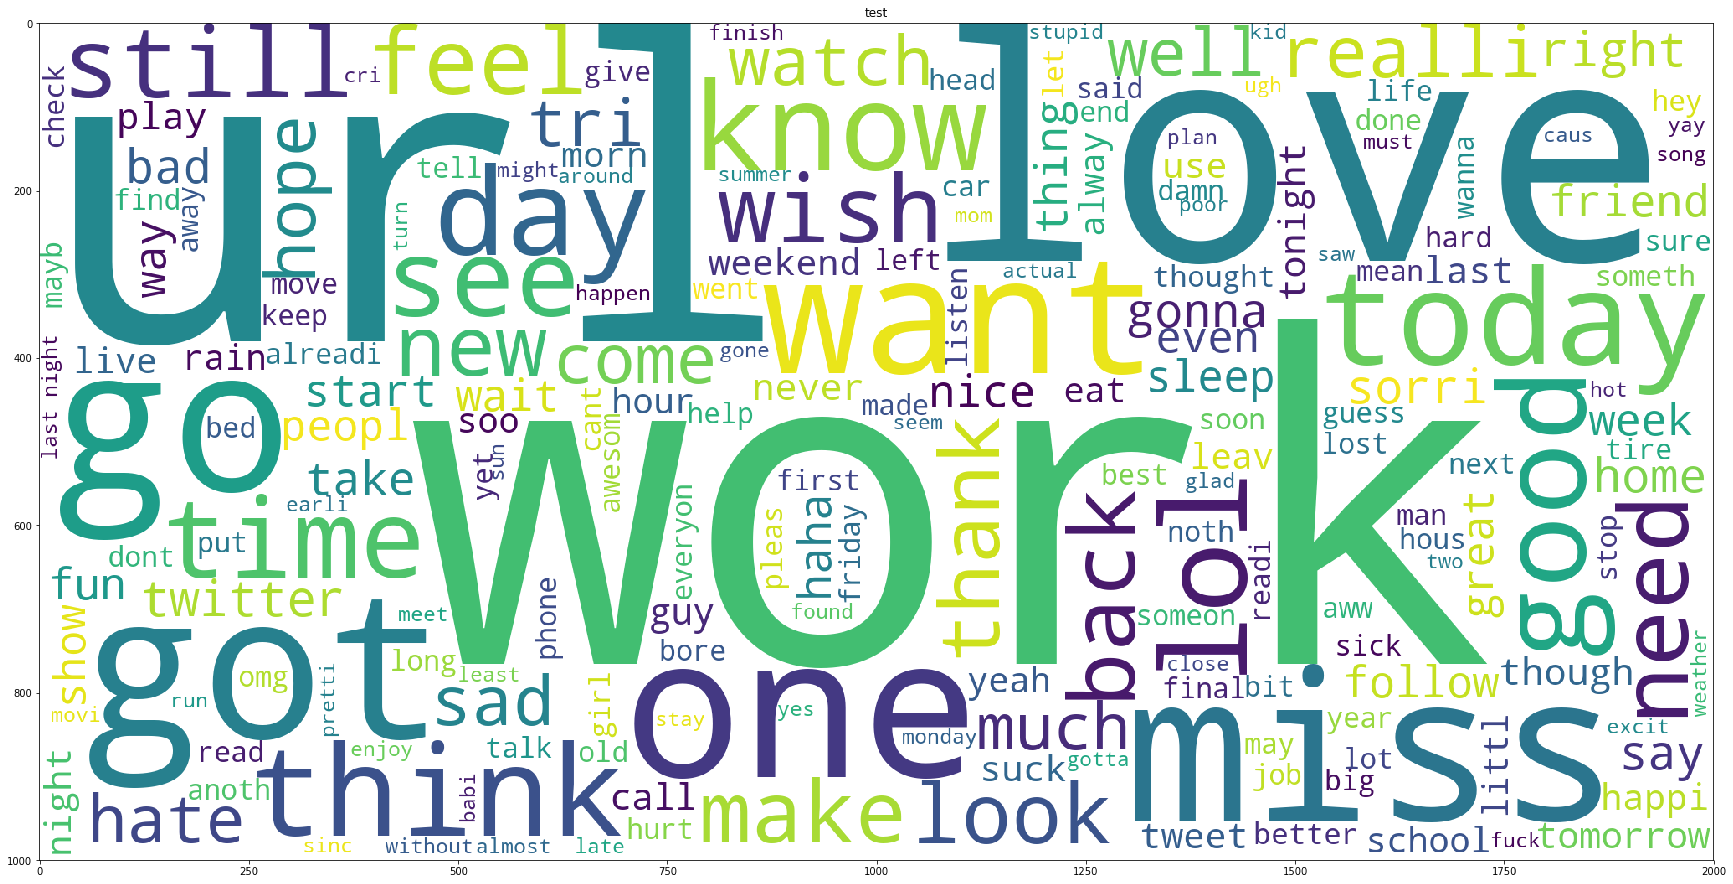

In [48]:
from wordcloud import WordCloud #import wordcloud
plt.figure(figsize=(30,20)) #figure size
wordcloud = WordCloud(background_color="white",mode = "RGB", width = 2000, height=1000).generate(text_data_1)
plt.title("test")
plt.imshow(wordcloud) # image show

### Observation:
Here we see that most frequent words are: go, work, miss,url,love, got, think,want,today etc.
    

In [49]:
# drop the undesired columns
cleaned_text_data = data.drop(['content', 'clean_text'],axis=1)

In [50]:
# save the  cleaned_text_data to csv format
cleaned_text_data.to_csv("cleaned_text_data.csv",index=False)

# Insights

* Most of the datapoints actually belonging to only three classes - Neutral, Worry and Sadness. It means it is multi class imbalanced dataset.
* As we can see from the above analysis that approxi 54% of datapoints don't contain USER_HANDLE and 46% of datapoints contain USER_HANDLE. So it could be an important feature.
* We have seen from the boxplot of length_of_text and can analyse that most of the datapoints contain text length between 50 to 100. So it can also be an important feature.

## Final Observation on Twitter Data Analysis
- We preprocessed and cleaned the data set through the regular expression.
- Data set is imbalance with respect of sentiment such as anger, happy,sad, etc.
- We calculate the total number of user_handles in the dataset
- We also calculate the totla number of URL int the dataset
- We applied TFIdfVectorizer for both unigram and bigram.
- We visualize the wordcloud for clean_text
- We visualize the wordcloud for clena_text_with_stemming
- We save the cleaned csv file "cleaned_text_data"


## Reference:
https://github.com/anshuak100/twitter/blob/master/report.pdf?fbclid=IwAR0J0MX5cVXPFcm-x8krHzYtvOdi3LWz7iL1h9RHIbQK06nhhiJ8758Xz0w